# Task 1: Using an Existing Model (CycleGAN)

---



## Instructions on How to run the model

To execute the model, ensure you follow these steps:

1. Mount a Google drive to a specified path.
2. Navigate to the directory containing this file as your working directory.
3. Clone the `pytorch-CycleGAN-and-pix2pix.git` repository and navigate into the cloned folder.
4. Install necessary dependencies using the `pip` command, for instance: `!pip install -r requirements.txt`
5. Within the `datasets directory`, generate four folders - `trainA, trainB, testA, and testB`, and adhere to the additional guidelines provided in the `2. Datasets` section of this notebook.
6. There's no requirement to retrain the model. Instead, simply relocate the following four files, representing the trained model, to the `./checkpoints/face2catdog/` directory:

  1. latest_net_D_A.pth

  2. latest_net_D_B.pth

  3. latest_net_G_A.pth

  4. latest_net_G_B.pth

7. Execute sections `4. Testing` and `5. Visualize` to assess and visualize the trained model's performance.

## 0. Mounting a drive

We'll first mount the drive to the directory '/content/drive'. Afterward, we'll switch the working directory to the folder containing this file.

In [1]:
import os
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Deep Learning/Coursework/Task 1/')

Mounted at /content/drive


## 1. Git Cloning

Next, clone the PyTorch CycleGAN repository from GitHub, naming it `CycleGAN`. Navigate to the `CycleGAN` directory, then proceed to install all dependencies listed in the `requirements.txt` file using `pip install`.

In [ ]:
! git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git CycleGAN

fatal: destination path 'CycleGAN' already exists and is not an empty directory.


In [2]:
os.chdir("CycleGAN/")

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=4009cead582b064a6203a830ad9ddaee99503ddd11d3ae7b00aa7fde372898b3
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


## 2. Datasets

Before commencing the training process, I've organized four folders within the `datasets` directory: `trainA`, `trainB`, `testA`, and `testB`. Specifically, *trainA* comprises human faces designated for model training. This folder contains **a total of 10,000 images**, *evenly distributed between baby and celebrity face images*. On the other hand, *trainB* encompasses images of *cats and dogs*, *equally divided*, *totaling 10,000 images*. Additionally, the *testA* and *testB* folders hold testing images for *human faces and cats/dogs*, respectively. Each of these testing folders contains **20 images for evaluation**.

## 3. Training

To train the model, I've used a command which will invoke `train.py` file from the `CycleGAN directory`. In the below command I've passed in some parameters like `--dataroot` followed by **datasets path**, `--name` which stands for **name of the model** (In this case - **face2catdog**), `--model` stands for **model to use (ex. cycle_gan)**, `--n_epochs` **(number of epochs to train our model for)** and `--save_epoch_freq` **(to save our model after specified frequency)**

Following are the selected hyper-parameters:
1. --n_epochs = 20
2. --n_epochs_decay = 10
3. --save_epoch_freq = 10

In [ ]:
!python train.py --dataroot ./datasets/face2catdog --name face2catdog --model cycle_gan --display_id -1 --n_epochs=20 --n_epochs_decay=10 --save_epoch_freq=10

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/face2catdog        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

## 4. Testing

Ensure to utilize the configurations of the trained model as `--dataroot ./datasets/face2catdog` and `--name face2catdog`. Here, I've used `--model cycle_gan` which will convert Domain A to Domain B and Domain B to Domain A without specifing anything. The outcomes will be saved in the `results` folder.

In [4]:
!python test.py --dataroot ./datasets/face2catdog --name face2catdog --model cycle_gan --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/face2catdog        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## 5. Visualize

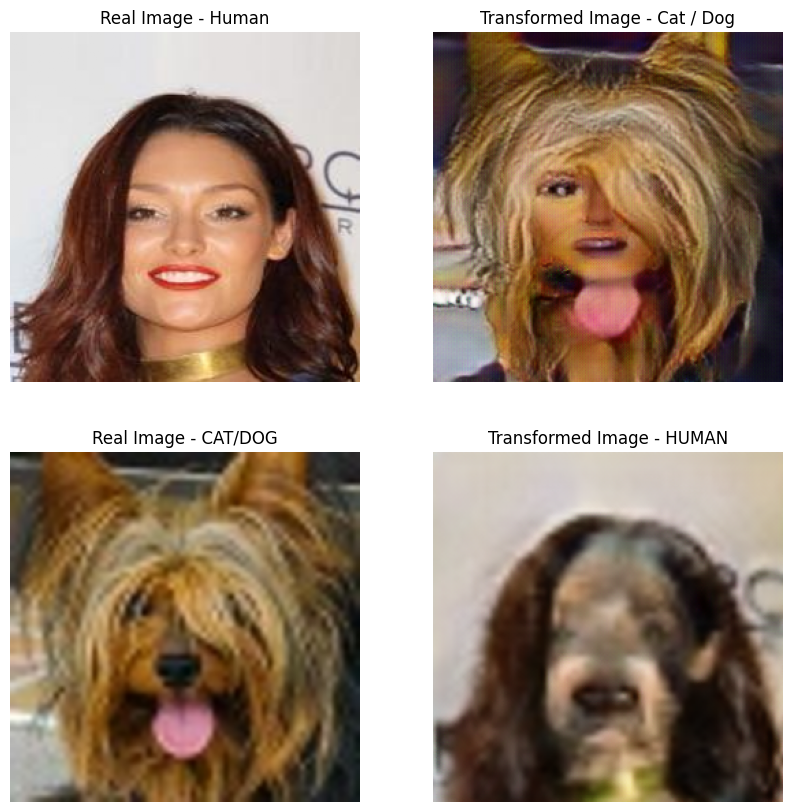

In [5]:
# load images
image1 = plt.imread('./results/face2catdog/test_latest/images/170236_real_A.png')
image2 = plt.imread('./results/face2catdog/test_latest/images/170236_fake_A.png')
image3 = plt.imread('./results/face2catdog/test_latest/images/170236_real_B.png')
image4 = plt.imread('./results/face2catdog/test_latest/images/170236_fake_B.png')


# Creating a figure and axis object
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Displaying images
axs[0, 0].imshow(image1)
axs[0, 0].axis('off')
axs[0, 0].set_title('Real Image - Human')

axs[0, 1].imshow(image2)
axs[0, 1].axis('off')
axs[0, 1].set_title('Transformed Image - Cat / Dog')

axs[1, 0].imshow(image3)
axs[1, 0].axis('off')
axs[1, 0].set_title('Real Image - Cat / Dog')

axs[1, 1].imshow(image4)
axs[1, 1].axis('off')
axs[1, 1].set_title('Transformed Image - Human')

plt.show()

---